In [6]:
from json import dumps, loads
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import scanpy as sc
from IPython.display import display

p_link = Path("/public/workspace/licanchengup/link")
p_test = p_link.joinpath('test')
p_disease = p_link.joinpath('dissease')

In [5]:
sys.path.append(str(p_test))

In [9]:
from func import load_adata

In [14]:
adata = load_adata("RA_GSE145286_mouse")
# adata.obs = adata.obs.loc[:, []]
adata.obs.head()

,status,label,batch,cell_type,CL,umap_x,umap_y
AAACCTGAGAACAATC_BRI203,Healty,WT,Healty_WT,perivascular,fibroblast,-6.669090,-1.876773
AAACCTGAGCTCCCAG_BRI203,Healty,WT,Healty_WT,sublining,fibroblast,-5.238616,-1.053888
AAACCTGAGGTGCTAG_BRI203,Healty,WT,Healty_WT,myeloid,macrophage,8.778333,1.813747
AAACCTGCAGGTTTCA_BRI203,Healty,WT,Healty_WT,intermediate,fibroblast,-0.508568,1.612448
AAACGGGAGGATGTAT_BRI203,Healty,WT,Healty_WT,sublining,fibroblast,-6.624209,-1.038925


In [15]:
adata.obs['CL'].value_counts()

CL
fibroblast          11707
macrophage           4613
endothelial cell     1212
T cell                304
chondrocyte           208
B cell                185
neutrophil            133
pericyte              129
Name: count, dtype: int64

In [3]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var["mt"] = adata.var_names.str.match("MT-", case=False)
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

In [4]:
adata.var['mt'].value_counts()

mt
False    18593
True        13
Name: count, dtype: int64

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(
    adata,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata, max_value=10)

In [6]:
sc.tl.pca(adata, svd_solver="arpack")

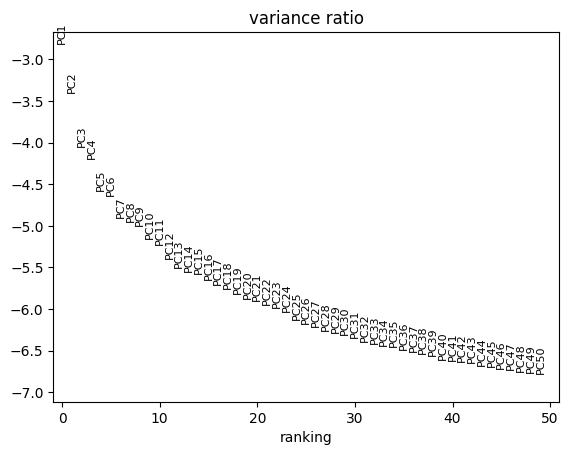

In [7]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [8]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.tl.leiden(adata,
             resolution=0.1)

/public/workspace/licanchengup/apps/miniconda3/envs/env_came/lib/python3.8/site-packages/pynndescent/pynndescent_.py:346: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "/public/workspace/licanchengup/apps/miniconda3/envs/env_came/lib/python3.8/site-packages/numba/core/types/functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  init_rp_tree(data, dist, current_graph, leaf_array)
/public/workspace/licanchengup/apps/miniconda3/envs/env_came/lib/python3.8/site-packages/pynndescent/pynndescent_.py:348: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced

/public/workspace/licanchengup/apps/miniconda3/envs/env_came/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


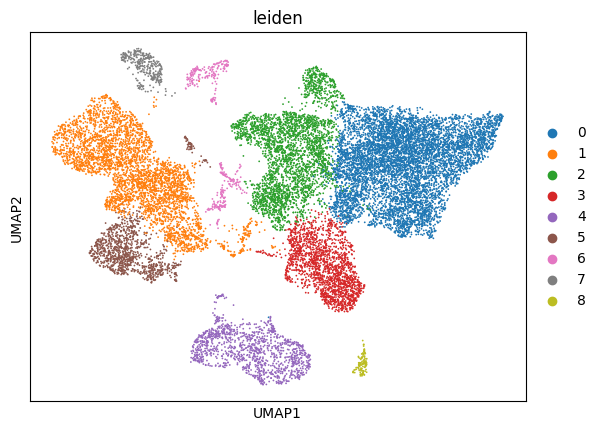

In [9]:
sc.pl.umap(adata, color=["leiden"])

In [19]:
# add CL
adata.obs = adata.obs.join(pd.read_csv("RA_GSE145286_mouse/obs.csv", index_col=0))

/public/workspace/licanchengup/apps/miniconda3/envs/env_came/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/public/workspace/licanchengup/apps/miniconda3/envs/env_came/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/public/workspace/licanchengup/apps/miniconda3/envs/env_came/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


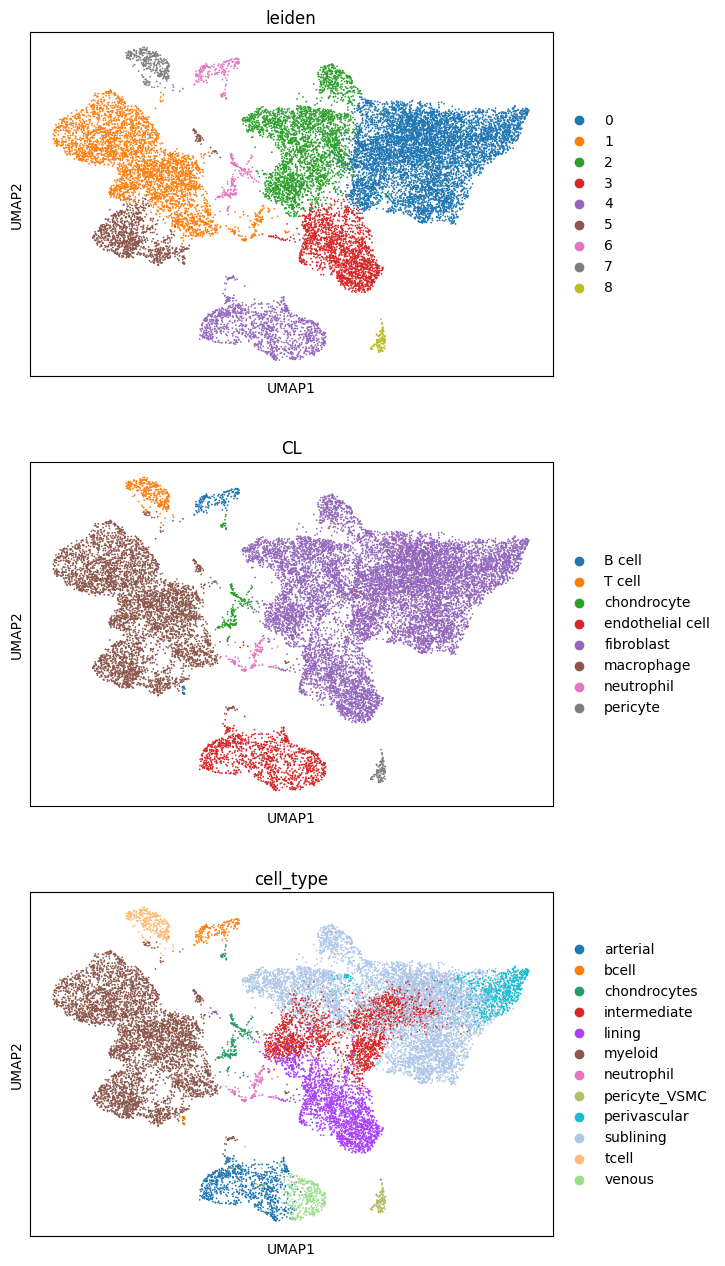

In [21]:
sc.pl.umap(adata, color=['leiden', 'CL', 'cell_type'],ncols=1)